In [1]:
# import packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import Bio
import statsmodels.api as sm
from scipy.optimize import curve_fit
import pylab



Import datasets and define variables

In [2]:
# import data from computer
path: str = './data/' #folder where files are stored
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_unique_prot.csv"), dtype=str)   # imports file from the folder as species, based on name
prokaryotes_all: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_all.csv"), dtype=str) # imports 3rd file from the folder, based on name

prokaryotes_all['temperature'] = prokaryotes_all['temperature'].astype('float64')
prokaryotes_all['fold_change'] = prokaryotes_all['fold_change'].astype('float64')
prokaryotes_all['Gene Ontology IDs'] = prokaryotes_all['Gene Ontology IDs'].astype('str')


Calculate sequence properties

In [55]:
prokaryotes['meltPoint'] = prokaryotes['meltPoint'].astype('float64')
prokaryotes['auc'] = prokaryotes['auc'].astype('float64')
prokaryotes['temperature'] = prokaryotes['temperature'].astype('float64')
prokaryotes['Length'] = prokaryotes['Length'].astype('float64')
prokaryotes['meltPoint'] = prokaryotes['meltPoint'].dropna()

from function import rel_aa_comp
from Aminoacid_lists import AA_list, AA_acidic, AA_hydrophobic, AA_polar_neutral, AA_basic

for i in range(len(AA_list)):
    prokaryotes[str(AA_list[i])] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, [str(AA_list[i])])) # calculates relative protein abundance

prokaryotes['AA_acidic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_acidic))
prokaryotes['AA_hydrophobic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_hydrophobic))
prokaryotes['AA_polar_neutral'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_polar_neutral))
prokaryotes['AA_basic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_basic))

Bin proteins based on low, mid, high melters (as done in paper).
Average each bin 

In [56]:
prokaryotes['binned'] = pd.cut(prokaryotes['auc'], bins = [0, 0.35, 0.65, 1.5], labels = ['low', 'medium', 'high'])

mean_list = ['A', 'V', 'I', 'L', 'M', 'F', 'W', 'N', 'Q', 'S', 'T', 'Y', 'D', 'E', 'R', 'H', 'K', 'C', 'P', 'G', 
             'AA_acidic', 'AA_basic', 'AA_hydrophobic', 'AA_polar_neutral', 'meltPoint', 'temperature', 'auc', 'Length']
prokaryotes_AUCgroup = prokaryotes.groupby(by = 'binned')
prokaryotes_AUCgroup_mean = prokaryotes_AUCgroup[mean_list].mean()

prokaryotes_AUCgroup_mean_corr = prokaryotes_AUCgroup_mean.corr()


C:\Users\marik\AppData\Local\Temp\ipykernel_27628\1974793698.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prokaryotes_AUCgroup = prokaryotes.groupby(by = 'binned')


In [74]:
print(f"Bin size \n {prokaryotes_AUCgroup.size()} \n \n"
    f"Average AUC \n low, medium, high \n{prokaryotes_AUCgroup_mean['auc'].unique()}"
    f"\n \n Average meltPoint \n low, medium, high \n{prokaryotes_AUCgroup_mean['meltPoint'].unique()}")


Bin size 
 binned
low       1021
medium    5665
high      5496
dtype: int64 
 
Average AUC 
 low, medium, high 
[0.28555022 0.51101116 0.86402258]
 
 Average meltPoint 
 low, medium, high 
[58.23168673 55.9118305  65.6658248 ]


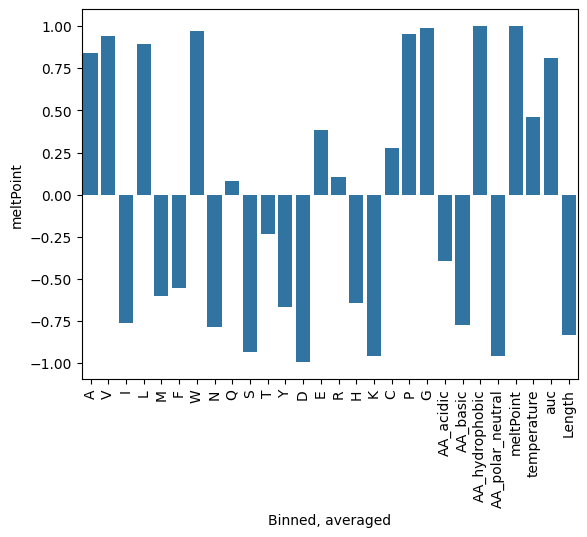

In [58]:
sns.barplot(data = prokaryotes_AUCgroup_mean_corr, x = prokaryotes_AUCgroup_mean_corr.columns, y = 'meltPoint')
plt.xticks(rotation = 90)
plt.xlabel('Binned, averaged')
plt.show()

In [40]:
prokaryotes_AUCgroup_mean_corr_cells = prokaryotes_AUCgroup_mean_corr[prokaryotes_AUCgroup_mean_corr['run_name'].str.contains('cell')]

sns.barplot(data = prokaryotes_AUCgroup_mean_corr_cells, x = prokaryotes_AUCgroup_mean_corr.columns, y = 'meltPoint')
plt.xticks(rotation = 90)
plt.xlabel('Binned, averaged')
plt.show()



KeyError: 'run_name'